<a href="https://colab.research.google.com/github/Sabir123556/AI-Lab/blob/main/ass7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#simple linear regression


import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
advertising=pd.DataFrame(pd.read_csv('/content/SLR_Salary_dataset.csv'))
advertising


,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


In [12]:
advertising.shape

(30, 2)

In [13]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [15]:
advertising.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [16]:
advertising.isnull().sum()

,0
YearsExperience,0
Salary,0


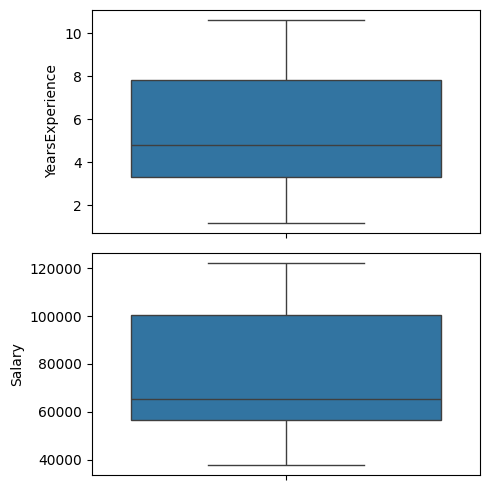

In [18]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(advertising['YearsExperience'], ax = axs[0])
plt2 = sns.boxplot(advertising['Salary'], ax = axs[1])
plt.tight_layout()

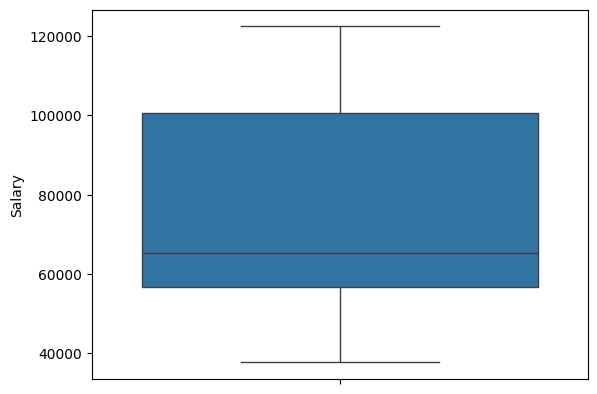

In [19]:
sns.boxplot(advertising['Salary'])
plt.show()

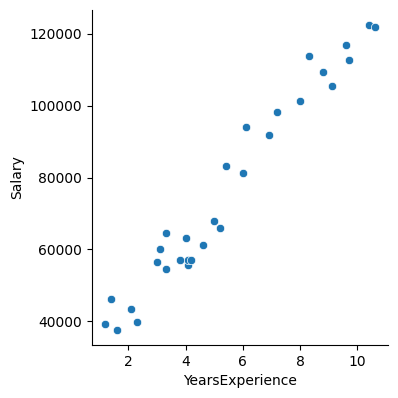

In [23]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['YearsExperience'], y_vars='Salary', height=4, aspect=1, kind='scatter')
plt.show()

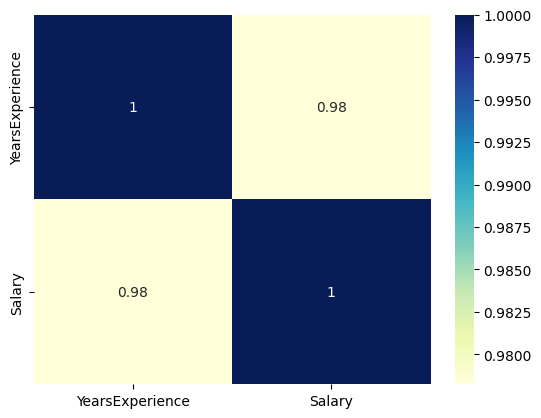

In [24]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [29]:
X = advertising['YearsExperience']
y = advertising['Salary']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.head()

,YearsExperience
17,5.4
22,8.0
11,4.1
4,2.3
29,10.6


In [35]:
y_train.head()

,Salary
17,83089
22,101303
11,55795
4,39892
29,121873


In [36]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

,0
const,24230.767402
YearsExperience,9731.203838


In [37]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        04:33:06   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.423e+04   2921.388     

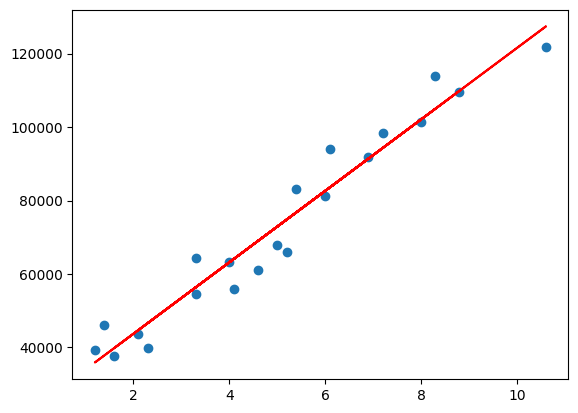

In [39]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.423e+04 + 9731.2038*X_train, 'r')
plt.show()

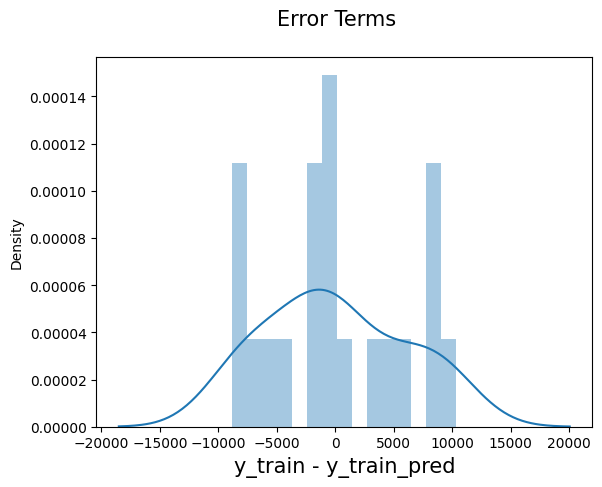

In [40]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


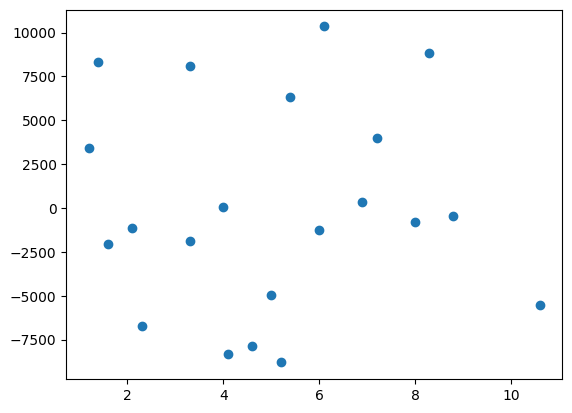

In [41]:
plt.scatter(X_train,res)
plt.show()

In [42]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)
y_pred.head()

,0
9,61209.341988
26,117650.324249
28,125435.287320
13,65101.823523
5,53424.378917


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5505.479002176151

In [47]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9627668685473266

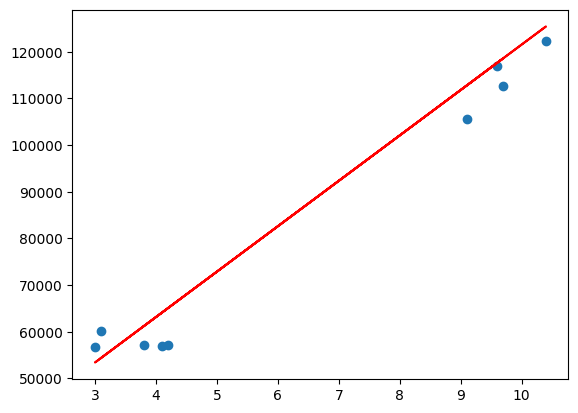

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 2.423e+04 + 9731.2038* X_test, 'r')
plt.show()